<a href="https://colab.research.google.com/github/Danil1D/KSVD/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1_1_%D0%B7%D0%B0%D0%B2_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Будь ласка, завантажте свій файл CSV...


Saving movie_metadata.csv to movie_metadata (4).csv
Навчання моделі: SimpleRNN
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.0027 - loss: 6.1771 - val_accuracy: 0.0040 - val_loss: 5.9988
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.0061 - loss: 5.8850 - val_accuracy: 0.0020 - val_loss: 6.0111
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.0081 - loss: 5.8991 - val_accuracy: 0.0100 - val_loss: 6.0367
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.0052 - loss: 5.8915 - val_accuracy: 0.0000e+00 - val_loss: 6.0299
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.0045 - loss: 5.8883 - val_accuracy: 0.0080 - val_loss: 6.0359
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.0053 - loss: 5.8969 - val_accuracy: 0.0070 - val_loss: 6.0477
Навчання моделі: LSTM
Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 54s 400ms/step - accuracy: 0.0046 - loss: 6.1578 - val_accuracy: 0.0000e+00 - val_loss: 6.0047
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 50s 398ms/step - accurac

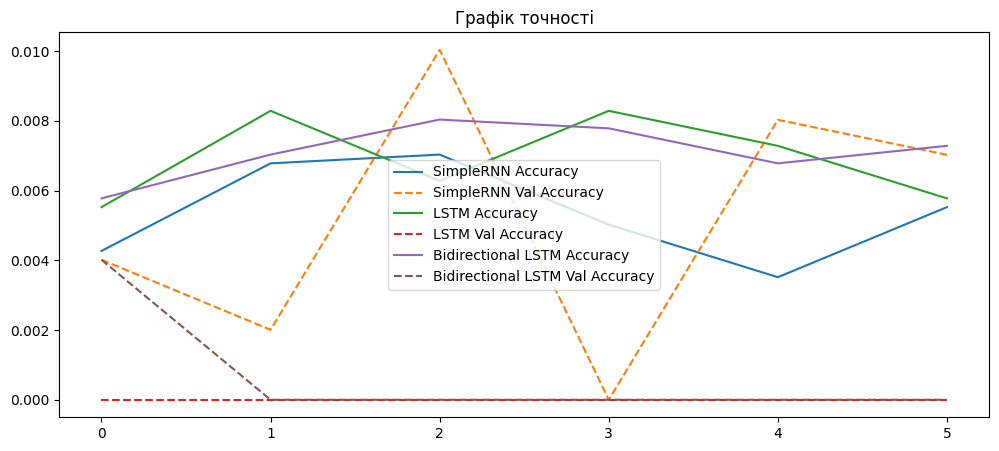

Оригінальні та передбачені сентименти:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Рецензія: Color...
Справжній сентимент: 520
Прогнозовані сентименти:
  SimpleRNN: 10.0
  LSTM: 5.0
  Bidirectional LSTM: 10.0
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Рецензія: Color...
Справжній сентимент: 300
Прогнозовані сентименти:
  SimpleRNN: 10.0
  LSTM: 5.0
  Bidirectional LSTM: 10.0
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Рецензія: Color...
Справжній сентимент: 502
Прогнозовані сентименти:
  SimpleRNN: 10.0
  LSTM: 5.0
  Bidirectional LSTM: 10.0
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Рецензія: Color...
Справжній сентимент: 527
Прогнозовані сентименти:
  SimpleRNN: 10.0
  LSTM: 5.0
  Bidirection

In [10]:
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU, Bidirectional, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from google.colab import files
except ModuleNotFoundError:
    raise ModuleNotFoundError("TensorFlow та інші бібліотеки не встановлені. Використовуйте 'pip install tensorflow keras-tuner'.")

# Завантаження користувацького датасету
print("Будь ласка, завантажте свій файл CSV...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Автоматичний вибір колонок
text_column = None
label_column = None

for col in df.columns:
    if df[col].dtype == object and text_column is None:
        text_column = col
    elif df[col].dtype in ['int64', 'float64'] and label_column is None:
        label_column = col

if text_column is None or label_column is None:
    print("Не вдалося автоматично знайти відповідні колонки. Переконайтеся, що ваш датасет містить текстову і міткову колонки.")
    print("Доступні колонки у датасеті:", df.columns)
    text_column = input("Введіть назву колонки з текстом: ")
    label_column = input("Введіть назву колонки з мітками: ")

df = df[[text_column, label_column]].dropna()
labels = sorted(df[label_column].unique())
label_map = {label: idx for idx, label in enumerate(labels)}
df[label_column] = df[label_column].map(label_map)

# Токенізація тексту
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df[text_column])
X = tokenizer.texts_to_sequences(df[text_column])
X = pad_sequences(X, maxlen=200, padding='post', truncating='post')
y = df[label_column].values

# Розділення даних на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функція для створення моделі
def build_rnn_model(rnn_layer):
    model = Sequential([
        Embedding(10000, 128, input_length=200),
        rnn_layer,
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(len(labels), activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Створення моделей
models = {
    "SimpleRNN": build_rnn_model(SimpleRNN(128)),
    "LSTM": build_rnn_model(LSTM(128)),
    "Bidirectional LSTM": build_rnn_model(Bidirectional(LSTM(128)))
}

# Навчання моделей
histories = {}
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for name, model in models.items():
    print(f"Навчання моделі: {name}")
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, callbacks=[early_stop])
    histories[name] = history

# Побудова графіків
plt.figure(figsize=(12, 5))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Accuracy')
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{name} Val Accuracy')
plt.legend()
plt.title('Графік точності')
plt.show()

# Вивід 10 рецензій та їх передбачень
sample_reviews = df[text_column].iloc[:10].values
sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200, padding='post', truncating='post')

print("Оригінальні та передбачені сентименти:")
for i, review in enumerate(sample_reviews):
    predicted_sentiments = {name: model.predict(sample_padded[i:i+1])[0] for name, model in models.items()}
    print(f"Рецензія: {review[:100]}...")
    print(f"Справжній сентимент: {df[label_column].iloc[i]}")
    print("Прогнозовані сентименти:")
    for name, pred in predicted_sentiments.items():
        predicted_label = labels[np.argmax(pred)]
        print(f"  {name}: {predicted_label}")
    print("---")
